# Predicting Saturation Vapour Pressure 

In this notebook we will build a regression based machine-learning model for predicting saturation vapour pressure. 

This notebook, set up in Google Colab, highlights linear regression and random forest models made by Borna. Detailed elements such as hyperparameter tuning and key parameter identification are omitted here but detailed in the accompanying report, which also explores other developed models by others in my team.

The final evaluation reveals that Borna's hyperparameter-tuned random forest model achieved a top 20% ranking on Kaggle. This was accomplished by prioritizing interpretability, with a minimal 1-3% gap in accuracy compared to the first-place entry, which employed a complex stack of models including neural networks, random forest, XGBoost, etc., to gain a slight edge in accuracy but less interpretability.

For more detailed analysis check the accompanying report. 


1. The first step consists of data analysis and preprocessing
* We will load the dataset, create a logarithmic transformation for pSat variable. 
* Analyze the dataset with a correlation heatmap and other relevant analysis methods.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
dataset = pd.read_csv('train.csv')

In [8]:
dataset.nunique()

Id                              27147
MW                                613
NumOfAtoms                         38
NumOfC                             10
NumOfO                             18
NumOfN                              3
NumHBondDonors                      7
NumOfConf                        1064
NumOfConfUsed                      40
parentspecies                       8
C.C..non.aromatic.                  3
C.C.C.O.in.non.aromatic.ring        3
hydroxyl..alkyl.                    6
aldehyde                            5
ketone                              6
carboxylic.acid                     4
ester                               3
ether..alicyclic.                   2
nitrate                             3
nitro                               3
aromatic.hydroxyl                   4
carbonylperoxynitrate               3
peroxide                            2
hydroperoxide                       5
carbonylperoxyacid                  4
nitroester                          3
pSat_Pa     

In [10]:
dataset.describe(include=(np.number))

,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,C.C..non.aromatic.,...,ether..alicyclic.,nitrate,nitro,aromatic.hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester,pSat_Pa
count,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,...,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,2.714700e+04
mean,74073.347957,264.436315,26.232843,6.860611,9.928390,1.060964,2.201643,229.643386,25.721921,0.092865,...,0.205142,0.665525,0.154050,0.001105,0.241389,0.279663,0.772977,0.259181,0.012451,5.708431e+01
std,47917.611394,49.858355,5.240883,1.451855,2.494574,0.712067,1.018979,202.905589,14.687277,0.290629,...,0.403813,0.673048,0.366171,0.047001,0.451312,0.448842,0.698533,0.467085,0.112537,5.928184e+03
min,0.000000,30.010565,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.624240e-14
25%,31724.500000,232.980781,23.000000,6.000000,8.000000,1.000000,2.000000,72.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659079e-06
50%,69861.000000,266.986260,26.000000,7.000000,10.000000,1.000000,2.000000,174.000000,30.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.552678e-04
75%,113432.000000,299.012475,30.000000,7.000000,12.000000,2.000000,3.000000,331.000000,40.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.974230e-03
max,166420.000000,386.044503,41.000000,10.000000,17.000000,2.000000,6.000000,1743.000000,40.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,7.324992e+05


In [11]:
missing_values = dataset.isnull().sum()
missing_values

Id                              0
MW                              0
NumOfAtoms                      0
NumOfC                          0
NumOfO                          0
NumOfN                          0
NumHBondDonors                  0
NumOfConf                       0
NumOfConfUsed                   0
parentspecies                   0
C.C..non.aromatic.              0
C.C.C.O.in.non.aromatic.ring    0
hydroxyl..alkyl.                0
aldehyde                        0
ketone                          0
carboxylic.acid                 0
ester                           0
ether..alicyclic.               0
nitrate                         0
nitro                           0
aromatic.hydroxyl               0
carbonylperoxynitrate           0
peroxide                        0
hydroperoxide                   0
carbonylperoxyacid              0
nitroester                      0
pSat_Pa                         0
dtype: int64

In [12]:
dataset['pSat_Pa_log'] = np.log10(dataset['pSat_Pa'] + 1e-9)

In [13]:
unique_parentspecies = dataset['parentspecies'].nunique()
dataset_encoded = pd.get_dummies(dataset, columns=['parentspecies'])

dataset_encoded.head()

,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,C.C..non.aromatic.,...,pSat_Pa,pSat_Pa_log,parentspecies_None,parentspecies_apin,parentspecies_apin_decane,parentspecies_apin_decane_toluene,parentspecies_apin_toluene,parentspecies_decane,parentspecies_decane_toluene,parentspecies_toluene
0,0,30.010565,4,1,1,0,0,1,1,0,...,641974.491,5.807518,0,0,0,1,0,0,0,0
1,1,74.995643,6,1,3,1,0,1,1,0,...,10295.712,4.012656,0,0,0,0,0,0,0,1
2,2,102.990558,8,2,4,1,0,2,2,0,...,13517.575,4.130899,0,0,0,0,0,0,0,1
3,3,118.985472,9,2,5,1,1,3,1,0,...,241.630,2.383151,0,0,0,0,0,0,0,1
4,4,134.980387,10,2,6,1,1,3,3,0,...,315.357,2.498802,0,0,0,0,0,0,0,1


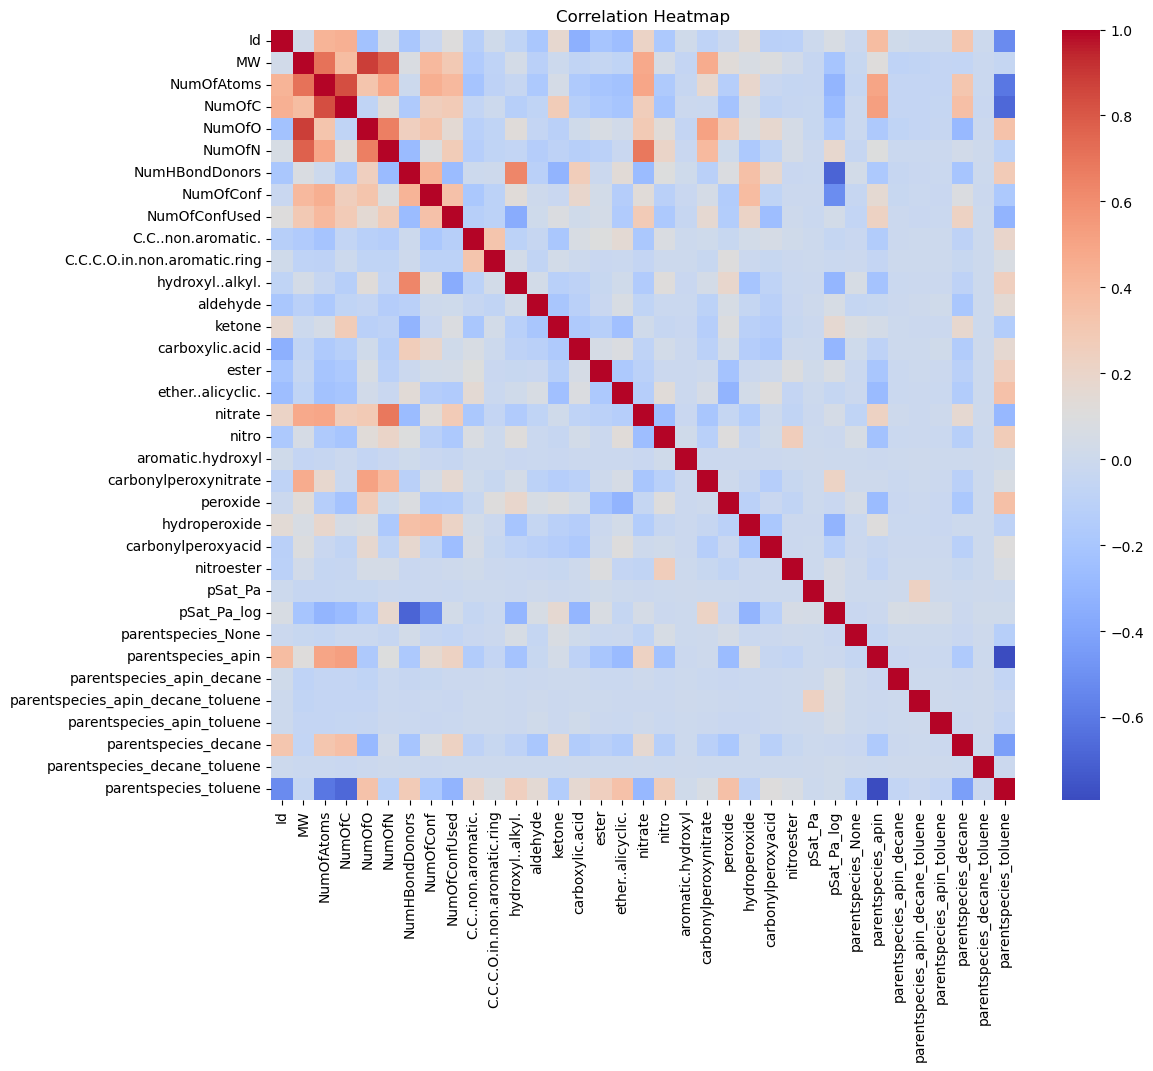

In [16]:
correlation_matrix = dataset_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

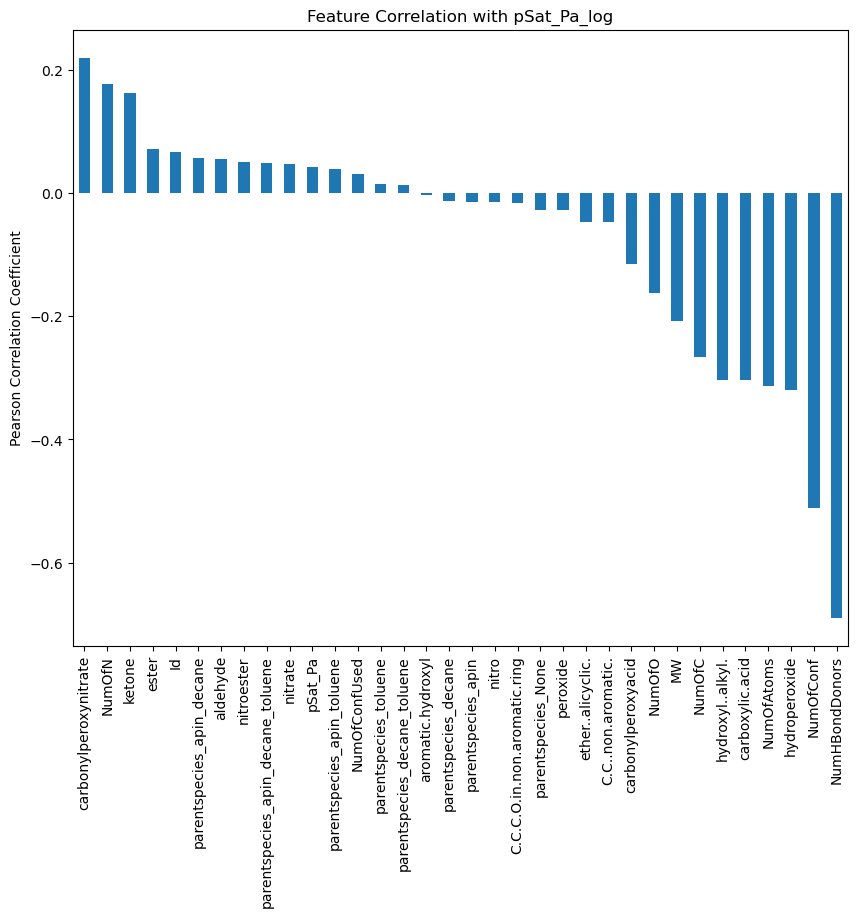

pSat_Pa_log                          1.000000
carbonylperoxynitrate                0.219608
NumOfN                               0.176541
ketone                               0.161770
ester                                0.070731
Id                                   0.065759
parentspecies_apin_decane            0.056103
aldehyde                             0.055687
nitroester                           0.050310
parentspecies_apin_decane_toluene    0.048640
nitrate                              0.047540
pSat_Pa                              0.042680
parentspecies_apin_toluene           0.038396
NumOfConfUsed                        0.030775
parentspecies_toluene                0.015137
parentspecies_decane_toluene         0.013448
aromatic.hydroxyl                   -0.003398
parentspecies_decane                -0.012690
parentspecies_apin                  -0.014238
nitro                               -0.014745
C.C.C.O.in.non.aromatic.ring        -0.016213
parentspecies_None                

In [17]:
correlation_with_target = dataset_encoded.corr()['pSat_Pa_log'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
correlation_with_target.drop('pSat_Pa_log').plot(kind='bar')
plt.title('Feature Correlation with pSat_Pa_log')
plt.ylabel('Pearson Correlation Coefficient')
plt.show()

correlation_with_target



The presence of both positive and negative correlations affecting the target variable indicates that a simple linear model might be insufficient due to its inability to capture non-linear patterns in the data. We should probably use non-linear models. Such as Random Forest, Gradient Boosting or Neural Networks. 

2. In the second step we will move to machine learning models. We will first start with more interpretable models  such as linear regressions and then move in to more flexible models such as random forests. 


## Lets move into Machine Learning 

1. Start with more simpler and more interpretable models. 
      - Linear Regression, Ridge or Lasso Regression
      
2. If simpler models are not flexible enough move to more flexible models
      - Decision trees,
      - Random Forest
      - Gradient Boosting Machines
      - Neural Networks
3. To avoid overfitting implement K-Fold Cross Validation
      - Common choice seems to be 5-10 folds, we will start with 5. 
4. Evaluation Metrics 
      - We will use RMSE,MAE or R2 score. 

Before moving into our models,  we should probably create a baseline model which we can then use a reference point when we create our models. For linear regressions we could implement mean predict, which just predicts the mean of the target variable for all instances. They dont use any feature to make predictions so our model should do better than them. 

In [22]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = dataset_encoded.drop(['pSat_Pa_log', 'pSat_Pa', "Id"], axis=1)
y = dataset_encoded['pSat_Pa_log']

dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X, y)
mean_preds = dummy_mean.predict(X)
rmse_mean = np.sqrt(mean_squared_error(y, mean_preds))
r2_mean = r2_score(y, mean_preds)

dummy_median = DummyRegressor(strategy='median')
dummy_median.fit(X, y)
median_preds = dummy_median.predict(X)
rmse_median = np.sqrt(mean_squared_error(y, median_preds))
r2_median = r2_score(y, median_preds)

rmse_mean, r2_mean, rmse_median, r2_median


(2.1341698960758944, 0.0, 2.1343604355452865, -0.00017856870295029914)

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

X = dataset_encoded.drop(['pSat_Pa_log', 'pSat_Pa',"Id"], axis=1)
y = dataset_encoded['pSat_Pa_log']

model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print(f'RMSE scores for each fold: {rmse_scores}')
print(f'Average RMSE: {np.mean(rmse_scores)}')
print(f'R² scores for each fold: {r2_scores}')
print(f'Average R²: {np.mean(r2_scores)}')

RMSE scores for each fold: [1.17871485 1.15325669 1.13396711 1.14633327 1.14402475]
Average RMSE: 1.1512593362078793
R² scores for each fold: [0.70056442 0.7036806  0.71839629 0.71249872 0.70937962]
Average R²: 0.7089039311706976


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

X = dataset_encoded.drop(['pSat_Pa_log', 'pSat_Pa', 'Id'], axis=1)
y = dataset_encoded['pSat_Pa_log']

best_params = {
    'max_depth': 40,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 300
}

model = RandomForestRegressor(**best_params, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

neg_mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

avg_r2_score = np.mean(r2_scores)
avg_rmse_score = np.mean(rmse_scores)

print(f'Average RMSE Score from Cross-Validation: {avg_rmse_score}')
print(f'Average R² Score from Cross-Validation: {avg_r2_score}')



Average RMSE Score from Cross-Validation: 1.1059201588776841
Average R² Score from Cross-Validation: 0.7313753670874124


## Model Performance Comparison

### Baseline Models (Dummy Regressor)
- **RMSE:** ~2.134
- **R²:** 0.0 (Mean Strategy), -0.00018 (Median Strategy)

### Linear Regression Model
- **Average RMSE:** ~1.151
- **Average R²:** ~0.709

### Random Forest Regressor (RFR)
- **Average RMSE:** ~1.106
- **Average R²:** ~0.731

### Analysis of Results

- **RMSE (Root Mean Squared Error)**
  - Measures the average magnitude of the errors between predicted and actual values.
  - Lower values indicate better performance.
  - **Best Performance:** Random Forest Regressor with the lowest RMSE.
  - **Improvement Over Baseline:** Both Linear Regression and RFR show significant improvement compared to the baseline.

- **R² (Coefficient of Determination)**
  - Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
  - Higher values (closer to 1) indicate better performance.
  - **Best Performance:** Random Forest Regressor with the highest R².
  - **Relative Performance:** Linear Regression improves over the baseline but is outperformed by RFR.


### Conclusion
The Random Forest Regressor, with specific tuning parameters, demonstrates the best performance among the models tested. It achieves the lowest RMSE and the highest R², indicating superior predictive accuracy and explanatory power compared to the Linear Regression Model and baseline Dummy Regressors.
